In [58]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [59]:
from tensorflow.keras.datasets import cifar10

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## load dataset

In [60]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [61]:
X_train.shape

(50000, 32, 32, 3)

In [62]:
X_test.shape

(10000, 32, 32, 3)

In [63]:
y_train.shape

(50000, 1)

In [64]:
y_test.shape

(10000, 1)

## Visualize data

grid view plot

In [65]:
x_grid = 15
y_grid = 15
n_training = X_train.shape[0]

fig, axes = plt.subplots(x_grid, y_grid, figsize=(25, 25))
axes = axes.ravel()

for i in range(x_grid * y_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

Output hidden; open in https://colab.research.google.com to view.

## Data preparation

normalize data

In [66]:
X_train = X_train / 255.0
X_test = X_test / 255.0

reshape target

In [67]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [68]:
n_target = len(set(y_train))

## Train model

In [69]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [70]:
i = Input(shape=X_train.shape[1:])
x = Conv2D(64, (3,3), 2, activation='relu')(i)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), 2, activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)
x = Dropout(0.25)(x)

x = Conv2D(128, (3,3), 2, activation='relu')(i)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), 2, activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)
x = Dropout(0.4)(x)

x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(n_target, activation='softmax')(x)

In [71]:
model = Model(i, x)

In [72]:
model.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 15, 15, 128)       3584      
_________________________________________________________________
batch_normalization_22 (Batc (None, 15, 15, 128)       512       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 7, 7, 128)         147584    
_________________________________________________________________
batch_normalization_23 (Batc (None, 7, 7, 128)         512       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 3, 3, 128)       

In [73]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Image Augmentation

In [74]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [75]:
batch_size = 32
dg = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, rotation_range=90)
img_dg = dg.flow(X_train, y_train, batch_size)

In [79]:
r = model.fit(img_dg, steps_per_epoch=n_training//batch_size, epochs=50, shuffle=True)

Epoch 1/50
1562/1562 [==============================] - 38s 24ms/step - loss: 1.6469 - accuracy: 0.4083
Epoch 2/50
1562/1562 [==============================] - 38s 24ms/step - loss: 1.5976 - accuracy: 0.4280
Epoch 3/50
1562/1562 [==============================] - 38s 24ms/step - loss: 1.5589 - accuracy: 0.4431
Epoch 4/50
1562/1562 [==============================] - 37s 24ms/step - loss: 1.5328 - accuracy: 0.4518
Epoch 5/50
1562/1562 [==============================] - 38s 24ms/step - loss: 1.5034 - accuracy: 0.4649
Epoch 6/50
1562/1562 [==============================] - 38s 24ms/step - loss: 1.4725 - accuracy: 0.4758
Epoch 7/50
1562/1562 [==============================] - 37s 24ms/step - loss: 1.4438 - accuracy: 0.4869
Epoch 8/50
1562/1562 [==============================] - 38s 24ms/step - loss: 1.4264 - accuracy: 0.4939
Epoch 9/50
1562/1562 [==============================] - 37s 24ms/step - loss: 1.4087 - accuracy: 0.5002
Epoch 10/50
1562/1562 [==============================] - 38s 24m

## Evaluate model

Plot loss and accuracy

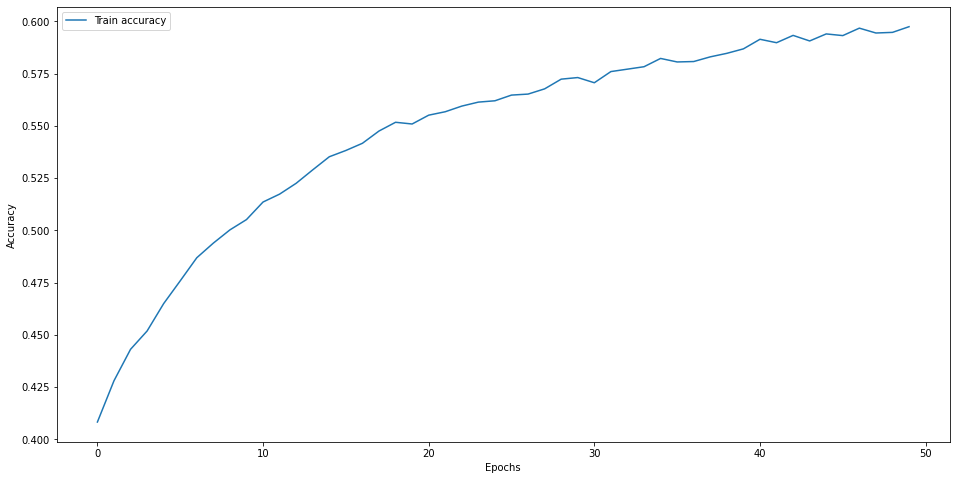

In [85]:
plt.figure(figsize=(16, 8))
plt.plot(r.history['accuracy'], label='Train accuracy')
# plt.plot(r.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

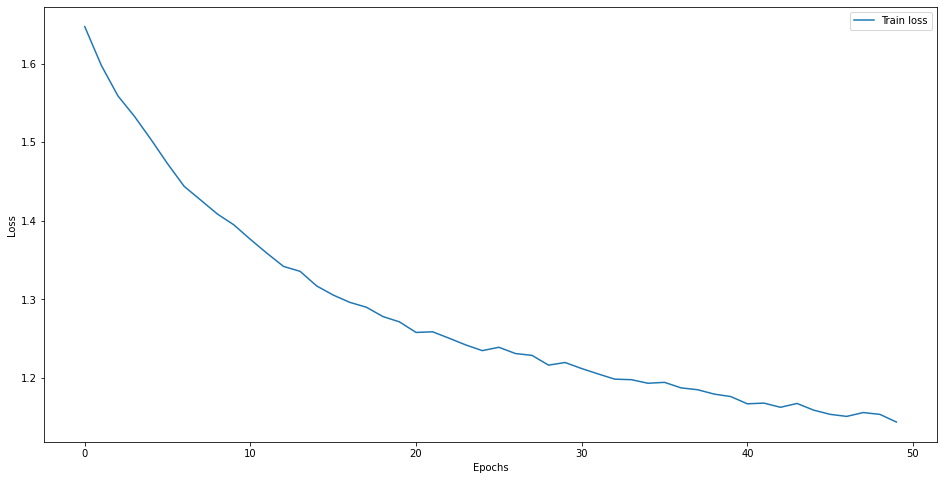

In [87]:
plt.figure(figsize=(16, 8))
plt.plot(r.history['loss'], label='Train loss')
# plt.plot(r.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Make Predictions

In [80]:
t_loss, t_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {t_acc}')
print(f'Test Loss: {t_loss}')

313/313 [==============================] - 1s 4ms/step - loss: 0.9916 - accuracy: 0.6484
Test Accuracy: 0.6484000086784363
Test Loss: 0.9916326403617859


In [81]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [82]:
y_pred = model.predict(X_test).argmax(axis=1)
cf = confusion_matrix(y_test, y_pred)

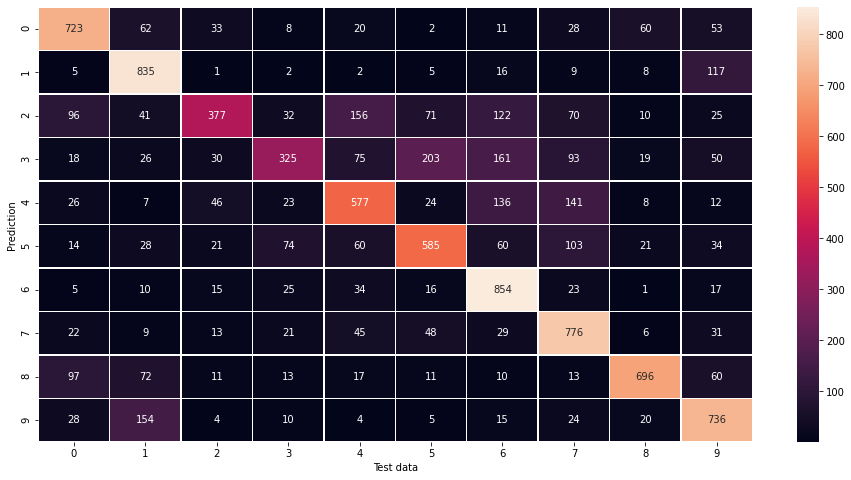

In [83]:
plt.figure(figsize=(16, 8))
sns.heatmap(cf, annot=True, fmt='d', linewidths=0.5)
plt.xlabel('Test data')
plt.ylabel('Prediction')
plt.show()